<a href="https://colab.research.google.com/github/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas (imports) e Macros

In [1031]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1032]:
new_cols = {}
new_cols_test = {}
remove_cols = set()

# EDA

## Panorama

In [1033]:
# ler train.csv
df = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/train.csv',
                 index_col = 0)

df_test = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/test.csv',
                    index_col = 0)

# verificar numero de linhas e colunas
df.shape

(1460, 80)

Demos load tanto no Df, quanto no Df_test.</br>
Todas as analises sao realizadas em Df, todas as alteracoes e normalizacoes sao realizadas tanto em Df, quanto em Df_test.</br>
A razão para isto é que o código iria quebrar se trocassemos a variavel para test, visto que saleprice é usado em diversos momentos.

In [1034]:
# Uma primeira visualizacao dos dados
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1035]:
# Verificar colunas, número de entradas não nulas e tipo das colunas
# Batendo dados com o dicionário: https://github.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/data_description.txt
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Pontos de Atenção:
- MSSubClass é categórico
- Street é binário [Grvl/Pave]
- OverallQual é uma nota (likert)
- OverallCond é uma nota (likert)
- CentralAir é binário [N/Y]

Colunas com muitos nulos:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

In [1036]:
# transformar numeros que representam categorias em objetos
# df[['MSSubClass', 'OverallQual', 'OverallCond']] =
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

In [1037]:
# listar apenas as colunas que possuem valores nulos
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Sera estudado caso a caso para saber se removemos ou não.
As colunas binárias serão tratadas junto com as demais categoricas se necessário alguma camada de encoding.

In [1038]:
# Examinando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [1039]:
# Examinando colunas categóricas
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


## Hipoteses

### Testar se há relacao entre:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

In [1040]:
# LowQualFinSF is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['LowQualFinSF'] ).sort_values()

Id
126      286
171      326
534      334
1101     438
52       456
        ... 
1170    3627
692     4316
1183    4476
524     4676
1299    5642
Length: 1460, dtype: int64

In [1041]:
# GrLivArea is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['GrLivArea'] ).sort_values()

Id
186    -572
171    -528
636    -515
1010   -514
89     -513
       ... 
490       0
489       0
488       0
486       0
1460      0
Length: 1460, dtype: int64

In [1042]:
# GrLivArea is equal the sum of the rest?
( df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] - df['GrLivArea'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

GrLivArea é a soma de 1stFlrSF, 2ndFlrSF e LowQualFinSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes

In [1043]:
df = df.drop(columns= 'GrLivArea')
df_test = df_test.drop(columns= 'GrLivArea')
remove_cols.add('GrLivArea')

### Testar se há relacao entre:
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

In [1044]:
# TotalBsmtSF is equal the sum of the rest?
( df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF'] - df['TotalBsmtSF'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

TotalBsmtSF é a soma de BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes

In [1045]:
# df = df.drop(columns= 'TotalBsmtSF')
# df_test = df_test.drop(columns= 'TotalBsmtSF')
# remove_cols.add('TotalBsmtSF')

## Colunas com muitos nulos

#### PoolQC (1453 nulos)

In [1046]:
# A pesar de existir "NA"("No Pool"), let's see its relation to PoolArea
df[df.PoolQC.isna()]['PoolArea'].unique()

array([0], dtype=int64)

In [1047]:
# Podemos preencher os valores com "NA"
df.loc[df.PoolQC.isna(), 'PoolQC'] = "N/A"
df.PoolQC.isna().sum()

0

In [1048]:
# Verificar a distribuicao dos valores
df.PoolQC.value_counts()

N/A    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [1049]:
#verificar media de valores entre as casas com e sem piscina
df.groupby('PoolQC')['SalePrice'].mean()

PoolQC
Ex     490000.000000
Fa     215500.000000
Gd     201990.000000
N/A    180404.663455
Name: SalePrice, dtype: float64

Mesmo havendo uma diferenca de preco entre as casas com e sem piscina, o fato de apenas 7 casas possuirem piscina pode nao ser suficiente para justificar a coluna.
Acreditamos que haverão outros fatores que influenciam mais no preço da casa, como por exemplo a localização, o tamanho da casa, etc.

In [1050]:
df = df.drop(columns= 'PoolQC')
df_test = df_test.drop(columns= 'PoolQC')
remove_cols.add('PoolQC')
#remover tambem a coluna PoolArea
df = df.drop(columns= 'PoolArea')
df_test = df_test.drop(columns= 'PoolArea')
remove_cols.add('PoolArea')

#### MiscFeature (1406 nulos)

In [1051]:
# Os valores representam outas caracteristicas nao representadas em outra colunas. No dicionario:
# MiscFeature: Miscellaneous feature not covered in other categories
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF) -> barracão
#        TenC	Tennis Court
#        NA	None
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Como há poucos valores para outras categorias alem de Shed (barracão),Vamos trocar a coluna para shed </br>
Os demais valores foram substituidos por N.

In [1052]:
def Shed_extraction(df_base):
    return np.where(df_base.MiscFeature == 'Shed', 1, 0)

new_cols['Shed'] = Shed_extraction(df)
new_cols_test['Shed'] = Shed_extraction(df_test)

df['Shed'] = Shed_extraction(df)
df_test['Shed'] = Shed_extraction(df_test)
df['Shed'].value_counts()

0    1411
1      49
Name: Shed, dtype: int64

In [1053]:
# Removendo antiga colunas
remove_cols.add('MiscFeature')
if 'MiscFeature' in df:
    df = df.drop(columns= 'MiscFeature')
if 'MiscFeature' in df_test:
    df_test = df_test.drop(columns= 'MiscFeature')
print('MiscFeature' in df)

False


In [1054]:
#verificar media de valores entre as casas com e sem barracao
df.groupby('Shed')['SalePrice'].mean()

Shed
0    181953.758327
1    151187.612245
Name: SalePrice, dtype: float64

#### Alley (1369 nulos)

In [1055]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# Alley: Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1056]:
# Preencher os nulos com NA para evitar confusão
df.loc[df.Alley.isna(), 'Alley'] = "N/A"
#preencher tambem no df_test
df_test.loc[df_test.Alley.isna(), 'Alley'] = "N/A"
df['Alley'].value_counts()

N/A     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [1057]:
#Verificar media de valores entre as casas com Grvl e Pave alley
df.groupby('Alley')['SalePrice'].mean()

#como a diferenca de valor das casas com Grvl e Pave alley é significativa, manteremos a coluna como esta.

Alley
Grvl    122219.080000
N/A     183452.131483
Pave    168000.585366
Name: SalePrice, dtype: float64

Como existe uma relação clara de valor entre ter um Alley, e seus respectivos valores, resolvemos 

In [1058]:
#Fazer map para transformar Alley em numerico, com Grvl=1, Pave=2 e N/A=3
df['Alley'] = df['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})
df_test['Alley'] = df_test['Alley'].map({'Grvl': 0, 'Pave': 1, 'N/A': 2})

#### Fence (1179 nulos)

In [1059]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fence
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1060]:
# Preencher os nulos com NA para evitar confusão
df.loc[df.Fence.isna(), 'Fence'] = "N/A"
#preencher tambem no df_test
df_test.loc[df_test.Fence.isna(), 'Fence'] = "N/A"
df['Fence'].value_counts()

N/A      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [1061]:
#sale price
df.groupby('Fence')['SalePrice'].mean()

Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
N/A      187596.837998
Name: SalePrice, dtype: float64

Casas sem cerca sao mais valiosas que casas com cerca. 
Acreditamos que este dataset não contem erros, e por isto, podem significa estar em uma area mais nobre/condomonio com regras.
De toda forma, decidir dar um Map nessas informacoes, transformando Os valores MnWw, GdWo, MnPrv em 1, GdPrv em 2, N/A em 3.

In [1062]:
#transformar Fence em numerico, com MnWw=1, GdWo=1, MnPrv=1, GdPrv=2 e N/A=3
df['Fence'] = df['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})
df_test['Fence'] = df_test['Fence'].map({'MnWw': 0, 'GdWo': 0, 'MnPrv': 0, 'GdPrv': 1, 'N/A': 2})

#### LotFrontage (259 nulos)

<Axes: ylabel='Frequency'>

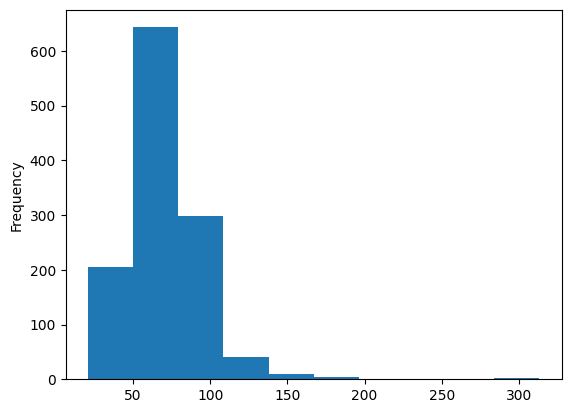

In [1063]:
# como é uma variavel numerica, vamos avaliar a distribuicao
df.LotFrontage.plot.hist()

In [1064]:
# olhando alguns dados das nulas
df[df.LotFrontage.isna()][['LotArea', 'Street', 'Alley']].sort_values('LotArea')

,LotArea,Street,Alley
Id,,,
1087,1974,Pave,2
1359,2117,Pave,2
181,2117,Pave,2
624,2117,Pave,2
976,2651,Pave,2
...,...,...,...
458,53227,Pave,2
1397,57200,Pave,2
707,115149,Pave,2


In [1065]:
# Porcentagem de nulos
print(f'{ df.LotFrontage.isna().sum() / df.shape[0] :.1%}')

17.7%


Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64

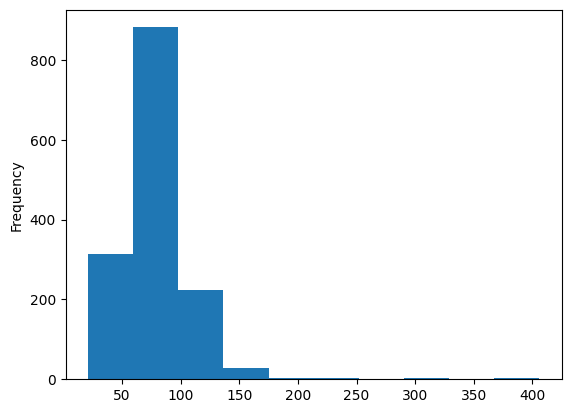

In [1066]:
# Como muitos dos dados são nulos, e 'LotArea' nunca é nulo,
# podemos inputar o valor como sendo raiz da area, numa aproximação
# do lote para um quadrado
def LotFrontage_sqrt_area(df_base):
    return df.LotFrontage.fillna(value= np.sqrt(df_base.LotArea))

LotFrontage_sqrt_area(df).plot.hist()
LotFrontage_sqrt_area(df_test)

O formato do histograma se mantem

In [1067]:
new_cols['LotFrontage'] = LotFrontage_sqrt_area
new_cols_test['LotFrontage'] = LotFrontage_sqrt_area
df['LotFrontage'] = LotFrontage_sqrt_area(df)
df_test['LotFrontage'] = LotFrontage_sqrt_area(df_test)
df['LotFrontage'].isna().sum()

0

#### FireplaceQu (690 nulos)


In [1068]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fireplace
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1069]:
# Bater com a quantidade de lareiras: Fireplaces
df[df.FireplaceQu.isna()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [1070]:
# Inserir NA no lugar dos nulos
df.FireplaceQu = df.FireplaceQu.fillna('N/A')
df_test.FireplaceQu = df_test.FireplaceQu.fillna('N/A')
df.FireplaceQu.value_counts()

N/A    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [1071]:
#value counts de SalePrice
df.groupby('FireplaceQu')['SalePrice'].mean()

FireplaceQu
Ex     337712.500000
Fa     167298.484848
Gd     226351.415789
N/A    141331.482609
Po     129764.150000
TA     205723.488818
Name: SalePrice, dtype: float64

Como há pouca representatividade de algumas categorias, pensamos em agrupá-las. Porém, vimos que a descrepancia de valor das colunas é altissimo.

*    Ex	Excellent - Exceptional Masonry Fireplace - 337k Price
*    Gd	Good - Masonry Fireplace in main level - 226k Price
*    TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement - 205k Price
*    Fa	Fair - Prefabricated Fireplace in basement -  167k Price
*    N/A - There is none - 141k Price
*    Po	Poor - Ben Franklin Stove -  129k Price

Por isto, decidimos novamente por um map, avaliando os de acordo com a diferenca de valores

In [1072]:
#map Fireplace
df['FireplaceQu'] = df['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_test['FireplaceQu'] = df_test['FireplaceQu'].map({'Po': 0, 'N/A': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

## Colunas com poucos nulos

In [1073]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical       1
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [1074]:
#preencher com Nan Electrical
df.Electrical = df.Electrical.fillna('N/A')
df_test.Electrical = df_test.Electrical.fillna('N/A')
#value counts
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
N/A         1
Name: Electrical, dtype: int64

In [1075]:
#value counts de SalePrice
df.groupby('Electrical')['SalePrice'].mean()

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
N/A      167500.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64

Mix, N/A e FuseP tem valores muito baixos, decidimos junta-los em N/A e considera-los como baixa qualidade.
<br/>
Como há uma relação direta de valor, fizemos um Map.

In [1076]:
#FuseP e Mix viram N/A, antes do map
df.loc[df.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df.loc[df.Electrical == 'Mix', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'FuseP', 'Electrical'] = 'N/A'
df_test.loc[df_test.Electrical == 'Mix', 'Electrical'] = 'N/A'

In [1077]:
#map Electrical com N/A=0, FuseF=1, FuseA=2, SBrkr=3
df['Electrical'] = df['Electrical'].map({'N/A': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3})
df_test['Electrical'] = df_test['Electrical'].map({'N/A': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3})

Verificamos que os Valores de MasVnrType que sao nulos também tem MasVnrArea nulo, significando se tratar de um terreno que não contem essa caracteristica.
</br>
Podemos entao tratar este valor como None

In [1078]:
#preencher com Nan MasVnrType e MasVnrArea
df.MasVnrType = df.MasVnrType.fillna('N/A')
df_test.MasVnrType = df_test.MasVnrType.fillna('N/A')
df.MasVnrArea = df.MasVnrArea.fillna(0)
df_test.MasVnrArea = df_test.MasVnrArea.fillna(0)


In [1079]:
#value counts MasVnrType
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
N/A          8
Name: MasVnrType, dtype: int64

In [1080]:
#value counts de SalePrice
df.groupby('MasVnrType')['SalePrice'].mean()

MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
N/A        236484.250000
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64

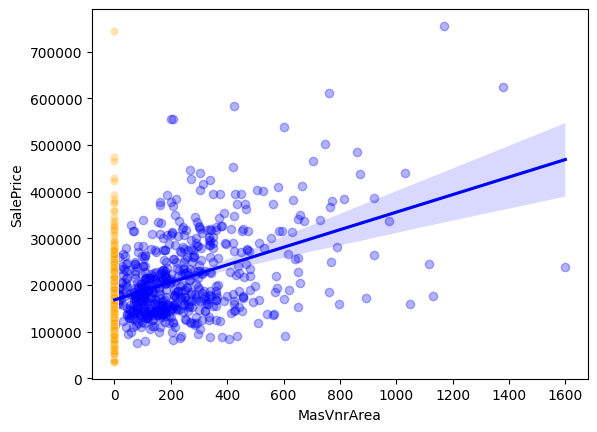

In [1081]:
#plotar uma linha de tendencia desconsiderando o valor 0, o valor 0 deve estar em laranja, os valores normais em azul e a linha de tendencia em vermelho
sns.regplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea != 0], color= 'blue', scatter_kws={'alpha':0.3})
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= df[df.MasVnrArea == 0], color= 'orange', alpha= 0.3)
plt.show()

Desconsiderando o valor 0, vimos que existe uma tendencia de alta do valor de casas de acordo com a Area.
</br>
Verificar como os materiais impactam neste valor, e se este impacto é maior que o impacto de area.

In [1082]:
#verificar relacao entre MasVnrType, MasVnrArea
df.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
N/A          0.000000
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [1083]:
#qual é a media total de MasVnrArea, desconisderando os valores 0
df[df.MasVnrArea != 0]['MasVnrArea'].mean()

254.7394247038917

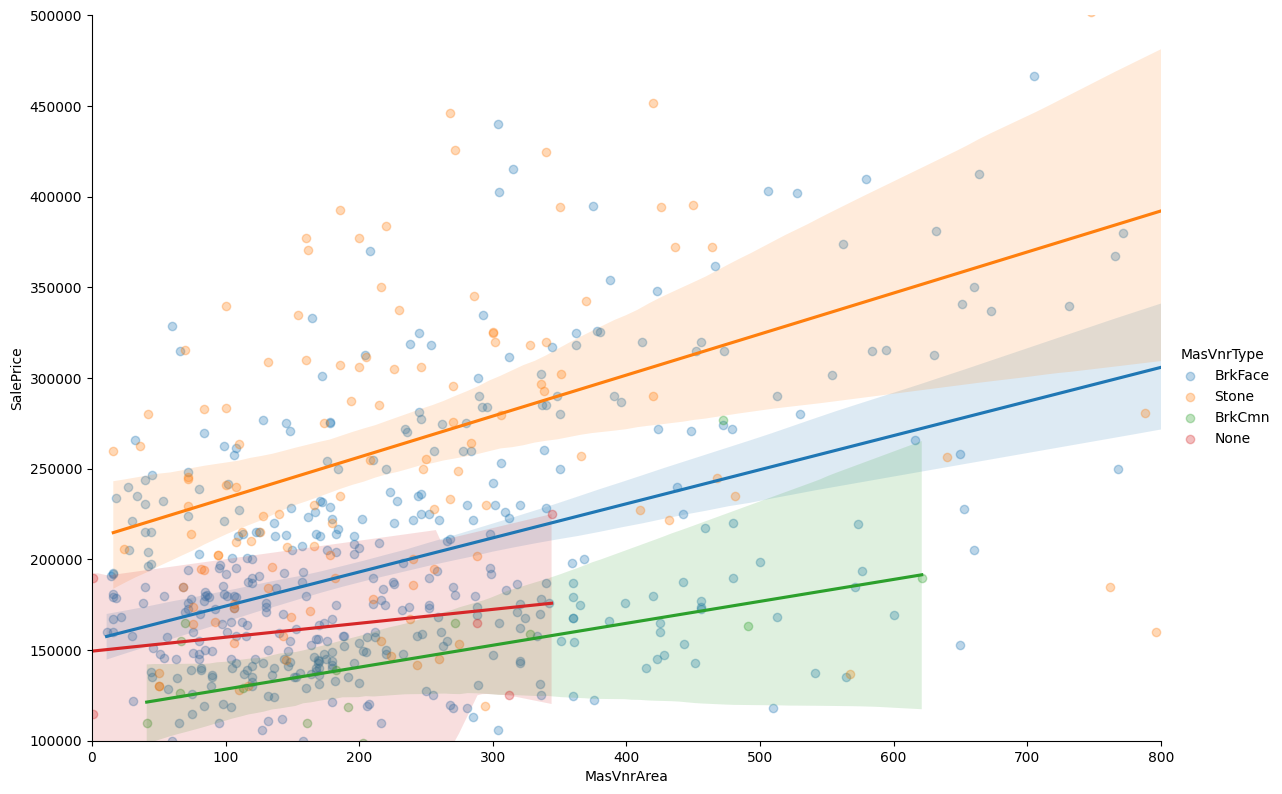

In [1084]:
sns.lmplot(x= 'MasVnrArea', y= 'SalePrice', hue= 'MasVnrType', data= df[df.MasVnrArea != 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 800)
plt.ylim(100000, 500000)
plt.show()

In [1085]:
#dividir o salesprice de casa de stone por 239, de brkcmn por 247, e de brkface por 259, e ver o resultado
print('Stone =',df[df.MasVnrType == 'Stone']['SalePrice'].mean() / 239.31)
print('BrkCmn =',df[df.MasVnrType == 'BrkCmn']['SalePrice'].mean() / 247.67)
print('BrkFace =',df[df.MasVnrType == 'BrkFace']['SalePrice'].mean() / 259.01)
#para termos uma comparacao, tambem dividiremos None pela media de todos os dados, sendo este 254.74
print('None =',df[df.MasVnrType == 'None']['SalePrice'].mean() / 254.74)

Stone = 1109.789081108186
BrkCmn = 590.7783206147967
BrkFace = 790.2855948037233
None = 613.2601523267006


Atraves dos graficos, e posterior analise, chegamos a conclusao que os materiais tem sim um grande impacto no valor da residencia, e que não se trata apenas de casas maiores/menores de materiais diferentes, com esta informação, fizemos um Map de MasVnrType, consideramos o Material mais barato, BrkCmn, com o mesmo valor de None

In [1086]:
#map MasVnrType com N/A=0, BrkCmn=0, BrkFace=1, Stone=2
df['MasVnrType'] = df['MasVnrType'].map({'N/A': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})
df_test['MasVnrType'] = df_test['MasVnrType'].map({'N/A': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})

Tratamento de todas as variaveis Basement/Porao

BsmtQual: Evaluates the height of the basement

        Ex	Excellent (100+ inches)	
        Gd	Good (90-99 inches)
        TA	Typical (80-89 inches)
        Fa	Fair (70-79 inches)
        Po	Poor (<70 inches)
        NA	No Basement

In [1087]:
#preencher NaN de BsmtQual
df.BsmtQual = df.BsmtQual.fillna('N/A')
df_test.BsmtQual = df_test.BsmtQual.fillna('N/A')

#value counts de BsmtQual
df.BsmtQual.value_counts()

TA     649
Gd     618
Ex     121
N/A     37
Fa      35
Name: BsmtQual, dtype: int64

BsmtCond: Evaluates the general condition of the basement

        Ex	Excellent
        Gd	Good
        TA	Typical - slight dampness allowed
        Fa	Fair - dampness or some cracking or settling
        Po	Poor - Severe cracking, settling, or wetness
        NA	No Basement

In [1088]:
#preencher NaN de BsmtCond
df.BsmtCond = df.BsmtCond.fillna('N/A')
df_test.BsmtCond = df_test.BsmtCond.fillna('N/A')

#value counts de BsmtCond
df.BsmtCond.value_counts()

TA     1311
Gd       65
Fa       45
N/A      37
Po        2
Name: BsmtCond, dtype: int64

BsmtExposure: Refers to walkout or garden level walls

        Gd	Good Exposure
        Av	Average Exposure (split levels or foyers typically score average or above)	
        Mn	Mimimum Exposure
        No	No Exposure
        NA	No Basement

In [1089]:
#preencher NaN de BsmtExposure
df.BsmtExposure = df.BsmtExposure.fillna('N/A')
df_test.BsmtExposure = df_test.BsmtExposure.fillna('N/A')

#value counts de BsmtExposure
df.BsmtExposure.value_counts()

No     953
Av     221
Gd     134
Mn     114
N/A     38
Name: BsmtExposure, dtype: int64

Rating of basement finished area. Applies to BsmtFinType1 and BsmtFinType2

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [1090]:
#preencher NaN de BsmtFinType1
df.BsmtFinType1 = df.BsmtFinType1.fillna('N/A')
df_test.BsmtFinType1 = df_test.BsmtFinType1.fillna('N/A')

#value counts de BsmtFinType1
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
N/A     37
Name: BsmtFinType1, dtype: int64

In [1091]:
#preencher NaN de BsmtFinType2
df.BsmtFinType2 = df.BsmtFinType2.fillna('N/A')
df_test.BsmtFinType2 = df_test.BsmtFinType2.fillna('N/A')

#value counts de BsmtFinType2
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
N/A      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Verificar se existe relação e se podemos excluir alguma das colunas, BsmtCond, BsmtExposure e BsmtQual

In [1092]:
#print relacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice, individualmente, com sort values descending
print(df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtCond')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtExposure')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending= False))
print(df.groupby('BsmtFinType2')['SalePrice'].mean().sort_values(ascending= False))


BsmtQual
Ex     327041.041322
Gd     202688.478964
TA     140759.818182
Fa     115692.028571
N/A    105652.891892
Name: SalePrice, dtype: float64
BsmtCond
Gd     213599.907692
TA     183632.620900
Fa     121809.533333
N/A    105652.891892
Po      64000.000000
Name: SalePrice, dtype: float64
BsmtExposure
Gd     257689.805970
Av     206643.420814
Mn     192789.657895
No     165652.295908
N/A    107938.342105
Name: SalePrice, dtype: float64
BsmtFinType1
GLQ    235413.720096
Unf    170670.576744
ALQ    161573.068182
LwQ    151852.702703
BLQ    149493.655405
Rec    146889.248120
N/A    105652.891892
Name: SalePrice, dtype: float64
BsmtFinType2
ALQ    209942.105263
Unf    184694.690287
GLQ    180982.142857
Rec    164917.129630
LwQ    164364.130435
BLQ    151101.000000
N/A    110346.236842
Name: SalePrice, dtype: float64


In [1093]:
df.groupby(['BsmtQual', 'BsmtExposure'])['SalePrice'].mean()

BsmtQual  BsmtExposure
Ex        Av              323434.571429
          Gd              393960.941176
          Mn              294542.000000
          No              283865.255814
Fa        Gd               61000.000000
          Mn              120260.000000
          No              116790.379310
Gd        Av              200928.385185
          Gd              225753.072464
          Mn              213302.629630
          N/A             192500.000000
          No              197349.147632
N/A       N/A             105652.891892
TA        Av              141620.666667
          Gd              183260.000000
          Mn              156684.804348
          No              136829.821839
Name: SalePrice, dtype: float64

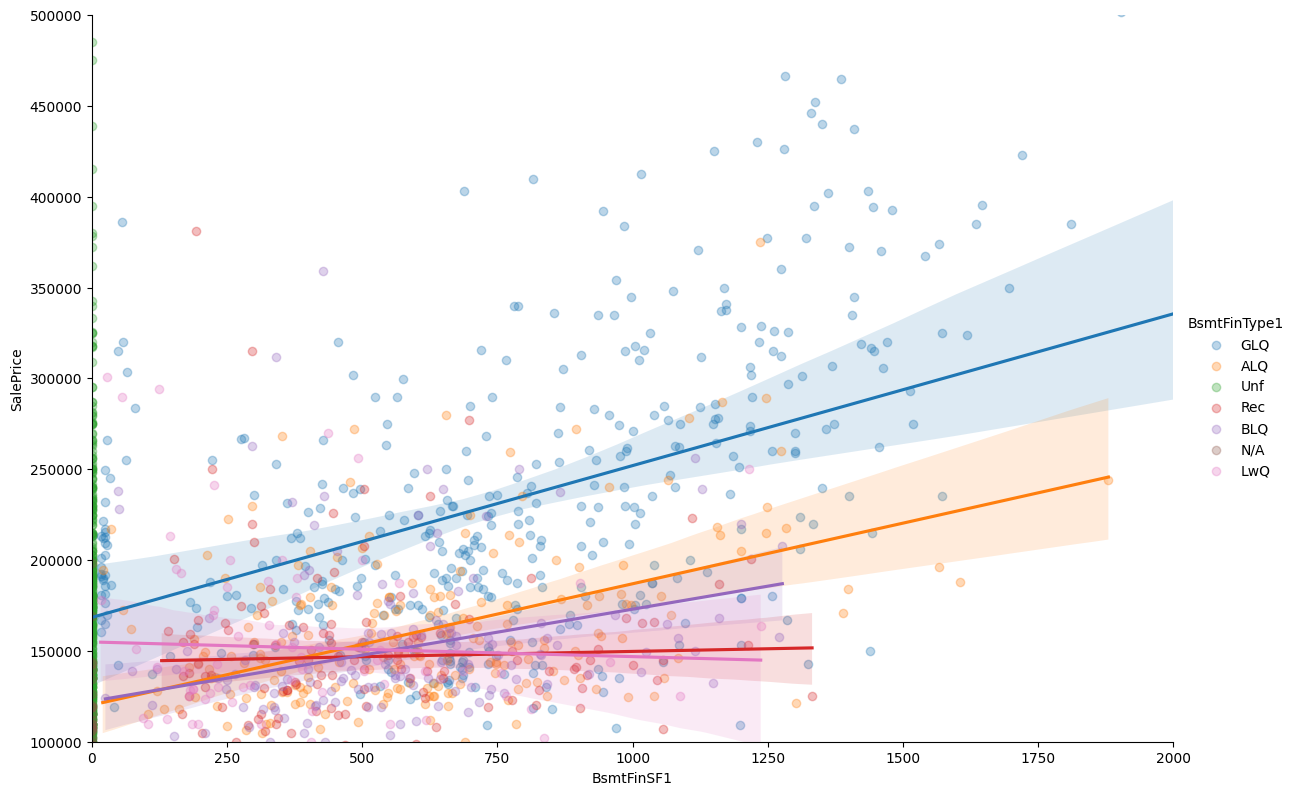

In [1094]:
#grafico scatter plot de BsmtFinSF1 e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Casas com porao GLQ, ALQ e BLQ tem valor de mercado maior, sendo que quanto maior a area, maior o valor

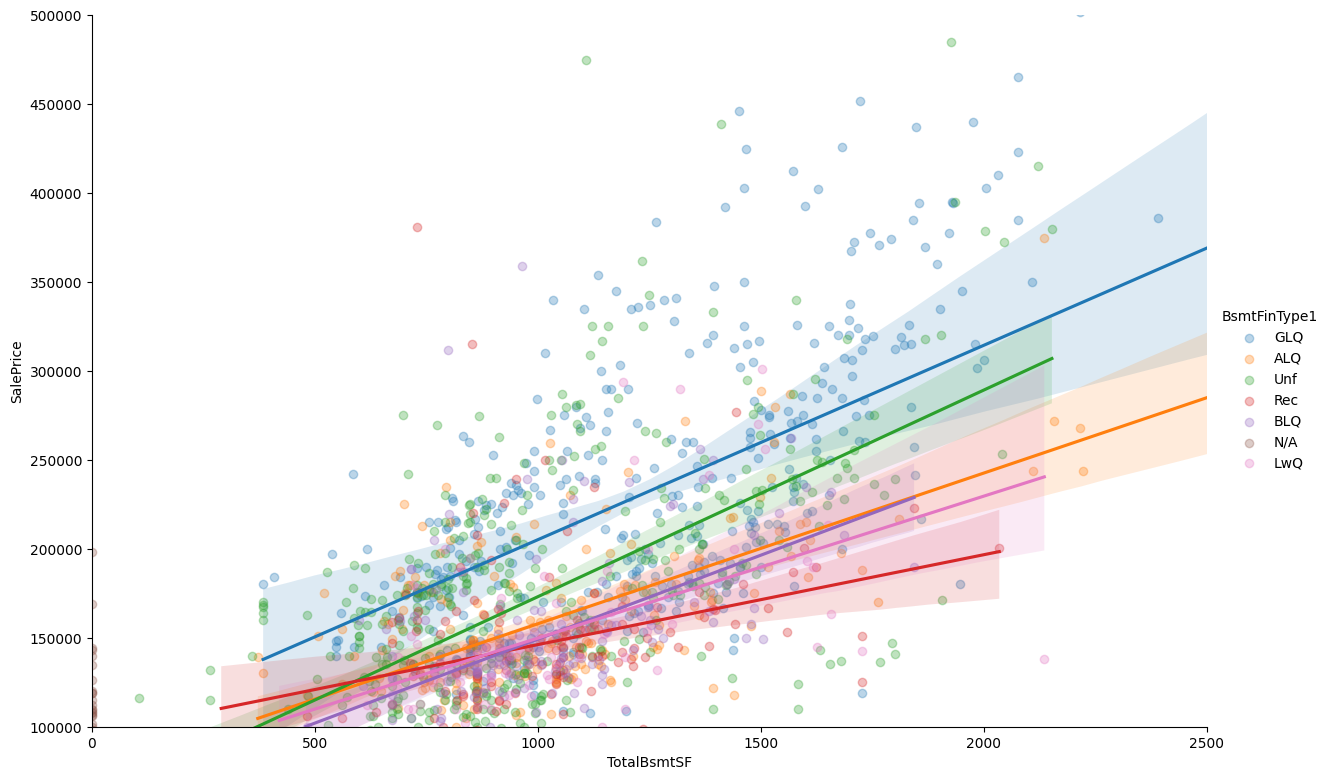

In [1095]:
#grafico scatter plot de TotalBsmtSF e SalePrice, com hue de BsmtFinType1, e linha de tendencia

sns.lmplot(x= 'TotalBsmtSF', y= 'SalePrice', hue= 'BsmtFinType1', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2500)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Existem casas com type 1 unfinished, e type 2. Isto significa que não podemos eliminar nenhuma das variaveis sem utilizar tratamentos avançados.

Alguns materias tem valor significativamente superior aos outros considerando a area, nesse caso, o GLQ, o ALQ, e o BLQ, os demais tem valor semelhante indeferentemente da area construida.</br>
Por esta razao, decidimos dar as variaveis LwQ, Rec, o mesmo valor no map.

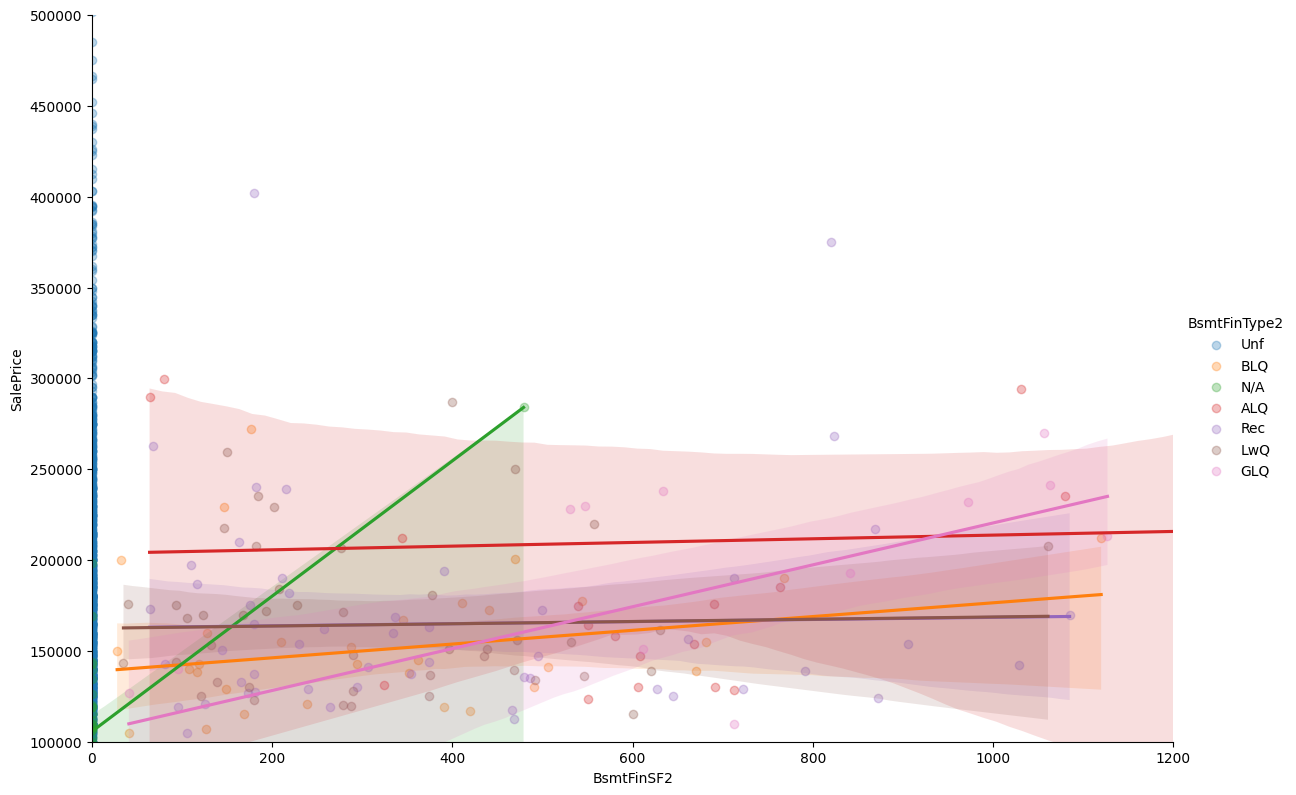

In [1096]:
#plotar o mesmo grafico com BsmtFinSF2
sns.lmplot(x= 'BsmtFinSF2', y= 'SalePrice', hue= 'BsmtFinType2', data= df, height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 1200)
plt.ylim(100000, 500000)
plt.show()

Conclusao: Algumas casas nao tem um segundo porao, mas tem area finalizada de segundo porão. Inconsistencia no dataset!? </br>
Vale a pena levar em conta apenas um material, e utilizar apenas a area total?

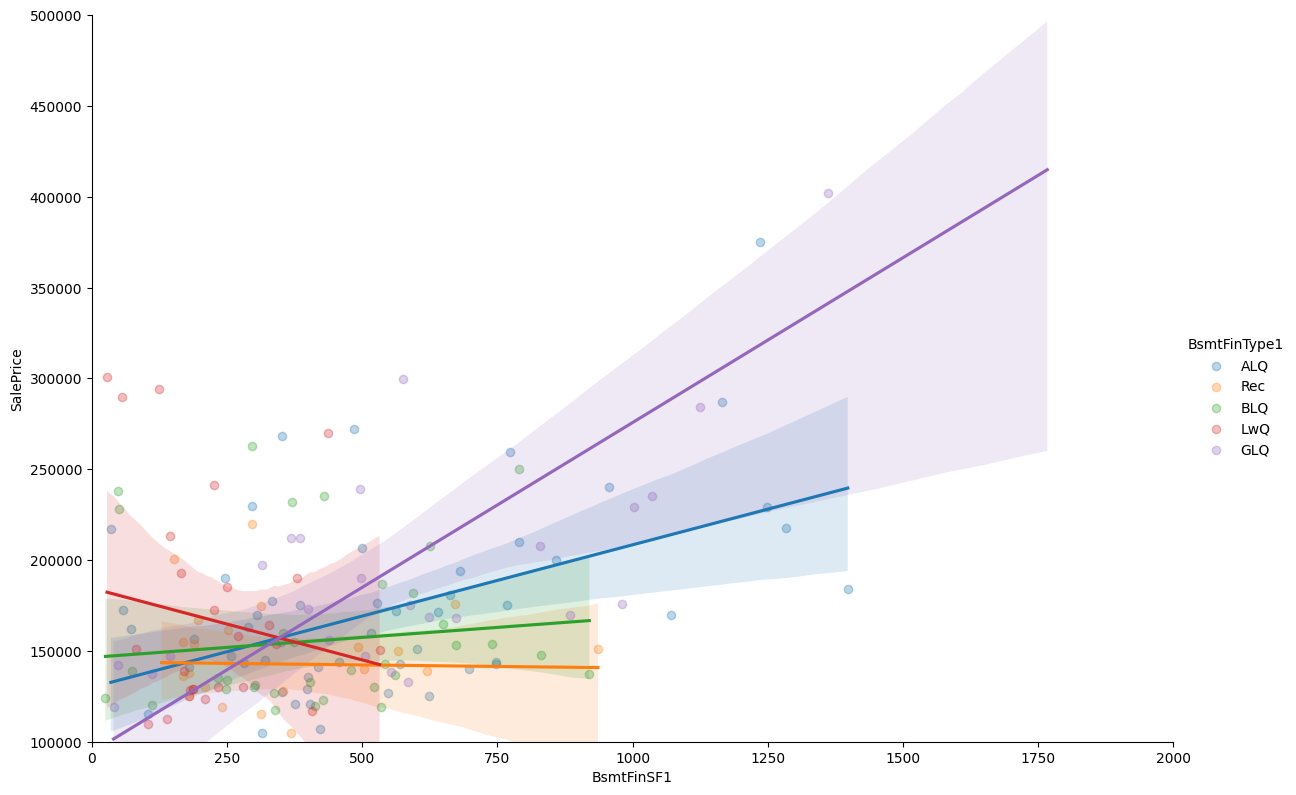

In [1097]:
#grafico analisando o BsmtFinType1 apenas de casas com BsmtFinSf2 > 0
sns.lmplot(x= 'BsmtFinSF1', y= 'SalePrice', hue= 'BsmtFinType1', data= df[df.BsmtFinSF2 > 0], height= 8, aspect= 1.5, scatter_kws={'alpha':0.3})
plt.xlim(0, 2000)
plt.ylim(100000, 500000)
plt.show()

Através das analises acima, chegamos na conclusao que ter um segundo porão afeta significativamente o preço da casa, Ter uma area para um segundo porao tambem afetam significamente o preço, mesmo q este nao esteja construido.

Através da analise acima, notamos que, no geral, a Qualidade tem muito mais peso do que o Exposure, porém, acreditamos que o modelo va calcular isto automaticamente.

In [1098]:
#map BsmtQual, BsmtCond, BsmtExposure, area1, area2, apenas em df
df['BsmtQual'] = df['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df['BsmtCond'] = df['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df['BsmtExposure'] = df['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'N/A': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'N/A': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

#map BsmtQual, BsmtCond, BsmtExposure, apenas em df_test
df_test['BsmtQual'] = df_test['BsmtQual'].map({'N/A': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
df_test['BsmtCond'] = df_test['BsmtCond'].map({'N/A': 1, 'Po': 0, 'Fa': 2, 'TA': 3, 'Gd': 4})
df_test['BsmtExposure'] = df_test['BsmtExposure'].map({'N/A': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

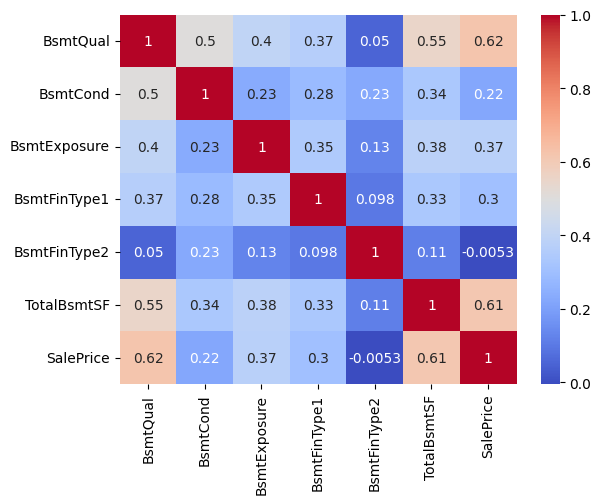

In [1099]:
#heatmap para verificar a correlacao entre BsmtQual, BsmtCond, BsmtExposure e SalePrice
sns.heatmap(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', ''TotalBsmtSF', 'SalePrice']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

Novamente, decidimos por fazer um map, visto que há relação direta entre as variaveis e o Saleprice.</br>


## Visualização de variáveis numéricas

In [1100]:
# atualizando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
col_num

Index(['LotFrontage', 'LotArea', 'Alley', 'YearBuilt', 'YearRemodAdd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Shed'],
      dtype='object')

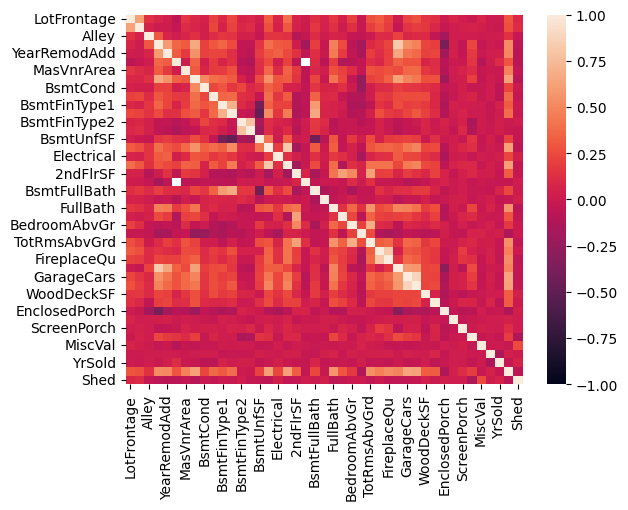

In [1101]:
# Correlaçoes
_ = sns.heatmap(df[col_num].corr(), vmax= 1, vmin= -1)

In [1102]:
# correlation matrix, with "Y-columns" as a column 'var1'
corr = df[col_num].corr().reset_index().rename(columns= {'index' : 'var1'})

# wide to long such as each row is: var1 - var2 - corr(var1, var2)
corr = corr.melt(id_vars= 'var1', var_name= 'var2')

# eliminar linhas da diagonal principal
corr = corr[corr.var1 != corr.var2]

# eliminar valores espelhados da matrix
corr[['var1', 'var2']] = corr.apply(
    lambda row: pd.Series(sorted(row[['var1', 'var2']])),
    axis=1
    )
corr = corr.drop_duplicates()

# Mostrar os valores com alta correlação
corr[np.abs(corr.value) > 0.8]

,var1,var2,value
158,GarageYrBlt,YearBuilt,0.825667
662,1stFlrSF,TotalBsmtSF,0.819530
1189,FireplaceQu,Fireplaces,0.812340
1321,GarageArea,GarageCars,0.882475


In [1103]:
# Vamos dropar essas colunas com alta correlação
# GarageYrBlt e GarageCars parecem menos relevantes
df = df.drop(columns= ['GarageYrBlt', 'GarageCars'])
remove_cols.update(['GarageYrBlt', 'GarageCars'])
remove_cols

{'GarageCars', 'GarageYrBlt', 'GrLivArea', 'MiscFeature', 'PoolArea', 'PoolQC'}

# Modelo de predição

In [1104]:
#teste train split pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=0)

#Criar X_Cols com apenas colunas numericas
X_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train = X_train[X_cols]
X_test = X_test[X_cols]

#trocar NaN por 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [1105]:
#criar pipeline Random Forest
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('', RandomForestRegressor())])

#treinar modelo
pipeline.fit(X_train, y_train)

#fazer previsões
y_pred = pipeline.predict(X_test)

#avaliar modelo
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print outras metricas


34628.706247455135


In [1106]:
#log do erro
print(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))

0.1498546015542695


In [1107]:
#describe saleprice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1108]:
#df head Exterior1st
df['Exterior1st'].head(20)

Id
1     VinylSd
2     MetalSd
3     VinylSd
4     Wd Sdng
5     VinylSd
6     VinylSd
7     VinylSd
8     HdBoard
9     BrkFace
10    MetalSd
11    HdBoard
12    WdShing
13    HdBoard
14    VinylSd
15    MetalSd
16    Wd Sdng
17    Wd Sdng
18    MetalSd
19    VinylSd
20    BrkFace
Name: Exterior1st, dtype: object

# Resultado do Desafio

In [1109]:
#read test.csv
df_test = pd.read_csv('test.csv')

In [1110]:
# #fazer previsao para test.csv, e escrever a resposta no arquivo csv
# df_test.fillna(0, inplace=True)
# y_pred_test = pipeline.predict(df_test[X_cols])
# #fill nan with 0

# df_test['SalePrice'] = y_pred_test

# df_test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

